In [55]:
import pandas as pd
df_ways = pd.read_csv("/content/ways.csv")

In [56]:
highway_primary = df_ways[(df_ways['highway'].isin(['primary'])) & (df_ways['distance'] < 30000)]
highway_primary.shape

(2016, 5)

In [57]:
coords = highway_primary[['lat', 'lon']]
display(coords.head())

,lat,lon
0,21.037674,105.860399
10,21.035592,105.854555
11,21.030891,105.856735
21,20.995145,105.856260
51,20.983464,105.852921


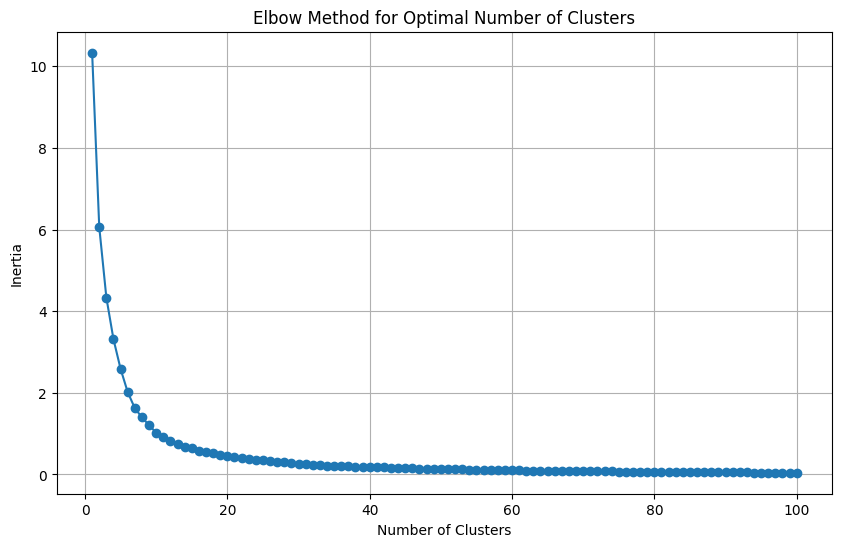

In [58]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
# Iterate through a range of possible cluster numbers
max_clusters = min(len(coords), 100) # Ensure we don't try to create more clusters than data points
for n_clusters in range(1, max_clusters + 1):
    # Initialize KMeans model
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # Set n_init explicitly
    # Fit the KMeans model to the coords DataFrame
    kmeans.fit(coords)
    # Append the inertia_ attribute
    inertia.append(kmeans.inertia_)

# Plot the inertia values against the number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()

In [59]:
n_clusters = 40
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
kmeans.fit(coords)

# Add cluster labels to the sampled_df
highway_primary['cluster_label'] = kmeans.labels_

# Select representative points (closest to centroid)
representative_points = []
for i in range(n_clusters):
    # Get points belonging to the current cluster
    cluster_points = highway_primary[highway_primary['cluster_label'] == i]

    # Check if the cluster is not empty
    if not cluster_points.empty:
        # Calculate the centroid of the cluster
        centroid = kmeans.cluster_centers_[i]

        # Find the point closest to the centroid using nsmallest
        closest_point = cluster_points.loc[((cluster_points[['lat', 'lon']] - centroid)**2).sum(axis=1).nsmallest(1).index[0]]


        # Append the closest point to the list of representative points
        representative_points.append(closest_point)

# Create a new DataFrame from the representative points
representative_df = pd.DataFrame(representative_points)

# Display the new DataFrame
representative_df.head()

/tmp/ipython-input-1670651574.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highway_primary['cluster_label'] = kmeans.labels_


,way_id,lat,lon,highway,distance,cluster_label
4498,4499,20.868275,105.902425,primary,18394.7,0
8080,8081,21.036788,105.781304,primary,11235.1,1
6076,6077,21.018681,105.829445,primary,5626.4,2
630,631,21.002489,105.654120,primary,23829.0,3
2738,2739,21.005000,105.792019,primary,9190.6,4


In [60]:
import folium

# Get the center coordinates for the map using the representative points
center_lat = representative_df['lat'].mean()
center_lon = representative_df['lon'].mean()

# Create a Folium map
m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# Add markers for each representative point
for index, row in representative_df.iterrows():
    folium.Marker([row['lat'], row['lon']], popup=f"Way ID: {row['way_id']}<br>Highway: {row['highway']}<br>Cluster: {row['cluster_label']}<br>Distance: {row['distance']:.2f}").add_to(m)

# Display the map
display(m)

In [61]:
highway_secondary = df_ways[(df_ways['highway'].isin(['secondary'])) & (df_ways['distance'] < 30000)]
highway_secondary.shape

(1581, 5)

In [62]:
coords = highway_secondary[['lat', 'lon']]
display(coords.head())

,lat,lon
4,21.025180,105.854185
18,21.019981,105.861611
20,21.007241,105.860852
23,20.999494,105.828700
24,20.999704,105.827914


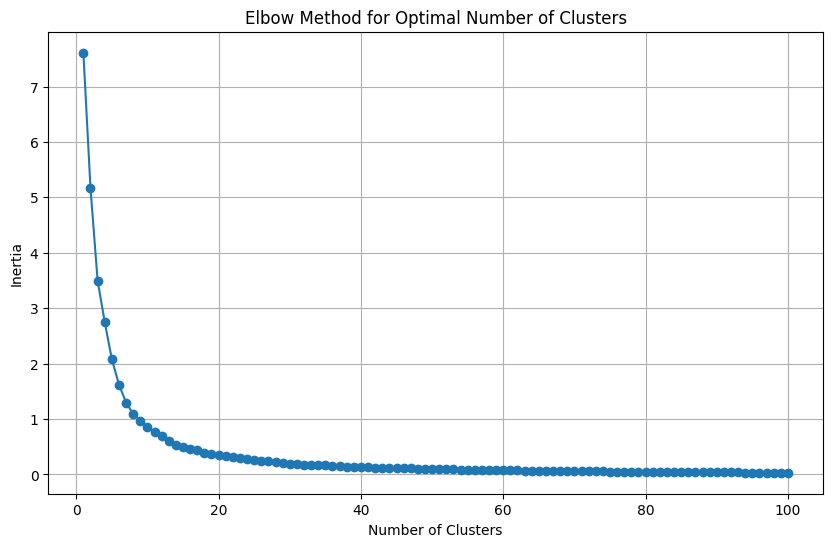

In [63]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
# Iterate through a range of possible cluster numbers
max_clusters = min(len(coords), 100) # Ensure we don't try to create more clusters than data points
for n_clusters in range(1, max_clusters + 1):
    # Initialize KMeans model
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # Set n_init explicitly
    # Fit the KMeans model to the coords DataFrame
    kmeans.fit(coords)
    # Append the inertia_ attribute
    inertia.append(kmeans.inertia_)

# Plot the inertia values against the number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()

In [64]:
n_clusters = 40
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
kmeans.fit(coords)

# Add cluster labels to the sampled_df
highway_secondary['cluster_label'] = kmeans.labels_

# Select representative points (closest to centroid)
representative_points = []
for i in range(n_clusters):
    # Get points belonging to the current cluster
    cluster_points = highway_secondary[highway_secondary['cluster_label'] == i]

    # Check if the cluster is not empty
    if not cluster_points.empty:
        # Calculate the centroid of the cluster
        centroid = kmeans.cluster_centers_[i]

        # Find the point closest to the centroid using nsmallest
        closest_point = cluster_points.loc[((cluster_points[['lat', 'lon']] - centroid)**2).sum(axis=1).nsmallest(1).index[0]]


        # Append the closest point to the list of representative points
        representative_points.append(closest_point)

# Create a new DataFrame from the representative points
representative_df = pd.DataFrame(representative_points)

# Display the new DataFrame
representative_df.head()

/tmp/ipython-input-2037192809.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highway_secondary['cluster_label'] = kmeans.labels_


,way_id,lat,lon,highway,distance,cluster_label
9582,9583,21.009926,105.811189,secondary,6616.9,0
1000,1001,21.083941,105.785210,secondary,15186.8,1
5987,5988,21.040980,105.790562,secondary,10692.8,2
1850,1851,20.983551,105.755943,secondary,13467.7,3
5210,5211,20.807440,105.891942,secondary,24363.6,4


In [65]:
import folium

# Get the center coordinates for the map using the representative points
center_lat = representative_df['lat'].mean()
center_lon = representative_df['lon'].mean()

# Create a Folium map
m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# Add markers for each representative point
for index, row in representative_df.iterrows():
    folium.Marker([row['lat'], row['lon']], popup=f"Way ID: {row['way_id']}<br>Highway: {row['highway']}<br>Cluster: {row['cluster_label']}<br>Distance: {row['distance']:.2f}").add_to(m)

# Display the map
display(m)